# Simple Stochastic Differential Equation Model in Python

Let $Z_t$ for $t\in [0,\infty)$ be the stochastic process for which:

1. $\Delta_{t_0}^{t_1}Z=Z_{t_1}-Z_{t_0}$ is normally distributed with mean 0 and variance $t_1-t_0>0$,
2. $\Delta_{t_0}^{t_1}Z$ and $\Delta_{s_0}^{s_1}Z$ are independent random variables whenever $[t_0,t_1]$ and $[s_0,s_1]$ are disjoint intervals.

In essence, the infinitesimal change in the random variable, $dZ_t$, behaves like a normally distributed random variable with mean 0 and variance $``dt"$.

A stochastic differential equation can be expressed as

$dX_t=r(X_t,t)dt+\sigma(X_t,t)dZ_t$

with initial value $X_0=c$, a constant random variable, and $r,\sigma$ functions of $X_t$ and $t$.

If we let $r(X_t,t)=r_0 X_t$ for $r\in\mathbb{R}$ and $\sigma(X_t,t)=\sigma_0 X_t$ with $\sigma_0>1$, we are searching for the stochastic process $X_t$ for which

$dX_t=X_t(r_0 dt+\sigma_0 dZ_t)$

Let us model the realization of a path $t\mapsto X_t(\omega)$, where $\omega$ is in the the event space $\Omega$.

We make use of the following facts:

1. If $\Delta_{t_0}^{t_1}Z$ is normally distributed with mean 0, variance $t_1-t_0$, then $\Delta_{t_0}^{t_1}Z=\sqrt{t_1-t_0}Y$, where $Y$ is a standard, normal random variable.
2. Consider the sub-division of the interval $[0,T]$ by intervals of length $T/N$. Let $t_k=kT/N$, and recursively define for $N\geq k\geq 1$:

$$X_{t_k}-X_{t_{k-1}}=X_{t_{k-1}}(r_0 (t_k-t_{k-1}) +\sigma_0 \Delta_{t_{k-1}}^{t_k}Z)$$.

Then for $t_k$,

$$X_{t_k}=X_{t_{k-1}}(1+r_0\frac{T}{N}+\sigma_0 \sqrt{T/N}~Y)$$.

i.e. at time $t_k$, the random variable is determined by what ocurred at time $t_{k-1}$. So to model a path or realization, we can plot $t_k$ against $X_{t_k}$. To approximate our random variable $X_T$, we sum over the values $X_{t_k}-X_{t_{k-1}}$:

$X_T\approx \sum_{k=1}^N X_{t_k}-X_{t_{k-1}}$ for $N$ large.

Importing some of the things we need:

In [100]:
import random
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
import numpy as np

Setting up our parameters:

In [68]:
X_0=5
r_0=-0.001
sigma_0=0.45
T=5
N=300

Setting up our $t_k$ points:

In [69]:
t=[]
for k in range(0,N+1):
    t+=[T*k/N]


Every time the following code is run, a new realization will be graphed:

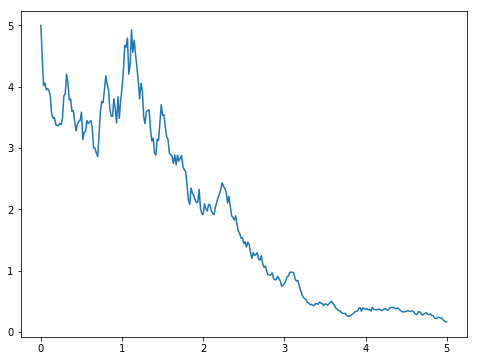

In [94]:
x=[X_0]
x+=[x[0]*(1+r_0+sigma_0*math.sqrt(T/N)*random.normalvariate(0,1))]
for k in range(2,N+1):
    x+=[x[k-1]*(1+r_0+sigma_0*math.sqrt(T/N)*random.normalvariate(0,1))]
plt.plot(t,x)
plt.show()

Now let's look at about 20 trials:

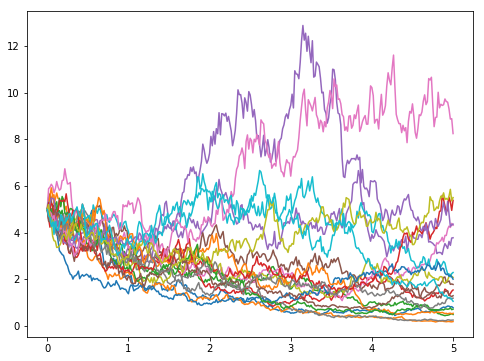

In [96]:
for j in range(0,20):
    x=[X_0]
    x+=[x[0]*(1+r_0+sigma_0*math.sqrt(T/N)*random.normalvariate(0,1))]
    for k in range(2,N+1):
        x+=[x[k-1]*(1+r_0+sigma_0*math.sqrt(T/N)*random.normalvariate(0,1))]
    plt.plot(t,x)
plt.show()


To determine a trend, we will store 10,000 realizations as the value $x_T(\omega)$, and then plot a histogram.

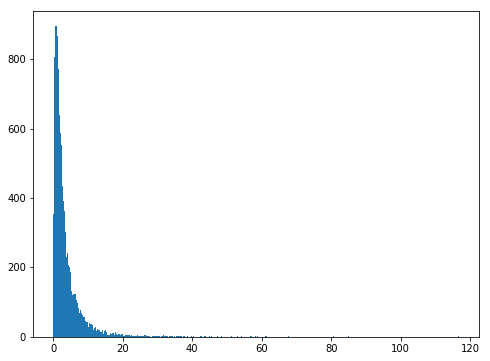

In [111]:
X_T=[]
for j in range(0,10000):
    x=[X_0]
    x+=[x[0]*(1+r_0+sigma_0*math.sqrt(T/N)*random.normalvariate(0,1))]
    for k in range(2,N+1):
        x+=[x[k-1]*(1+r_0+sigma_0*math.sqrt(T/N)*random.normalvariate(0,1))]
    X_T+=[x[N]]
plt.hist(X_T,bins='auto');

Which looks a lot like a log normal distribution...
Just to verify our suspicions:

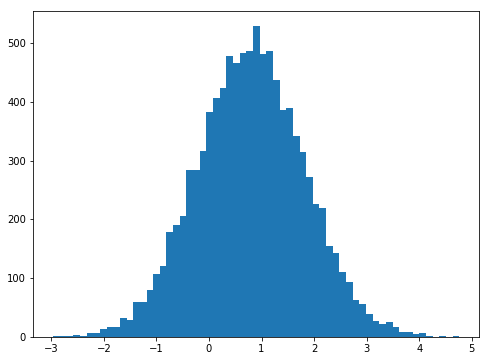

In [112]:
L_T=[]
for x in X_T:
    L_T+=[math.log(x)]
plt.hist(L_T,bins='auto');